In [2]:
%matplotlib notebook

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

In [46]:
from sklearn.linear_model import LinearRegression

In [87]:
xs = np.linspace(-10,10,100)
ys = np.sin(xs)
model = LinearRegression()

LinearRegression()

In [93]:
model.predict([[xs[-1]]])

array([0.21154927])

<IPython.core.display.Javascript object>


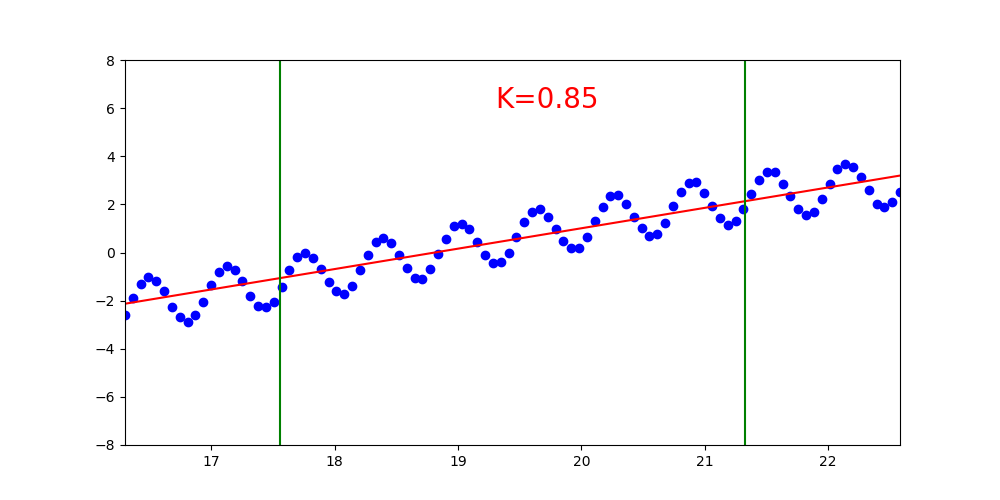

In [145]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

l1, = ax.plot([],[], 'bo')
l2, = ax.plot([],[], 'r')

left_l, = ax.plot([],[], c='g')
left_r, = ax.plot([],[], c='g')

K = ax.text(0,0,"", size=20)

def animate(i):
    left, right = i*0.1, 2*np.pi+i*0.1
    
    xs_a = np.linspace(left, right, 100)
    ys_a = np.sin(10*xs_a) + 3*np.sin(xs_a/3) + np.random.random(len(xs_a))*0.1
        
    l1.set_data(xs_a, ys_a)   
    model.fit(xs_a.reshape(-1,1), ys_a)
    l2.set_data([xs_a[0],xs_a[-1]], [*model.predict([[xs_a[0]]]), *model.predict([[xs_a[-1]]])])
            
    left_l.set_data([left+(right-left)*0.2, left+(right-left)*0.2],[-8, 8])
    left_r.set_data([left+(right-left)*0.8, left+(right-left)*0.8],[-8, 8])
    
    
    K.set_x(left+3)
    K.set_y(6)
    K.set_text("K={}".format(round(model.coef_[0],2)))
    if abs(model.coef_[0])>0.5:
        K.set_color('r')
    elif abs(model.coef_[0])>0.3:
        K.set_color('y')
    else:
        K.set_color('g')

    ax.axis([left, right, -8, 8])


fps = 10

ani = animation.FuncAnimation(fig, animate, frames=500, interval=1000./fps)

In [144]:
ani.save('myAnimation.gif', writer='pillow', fps=10)